<a href="https://colab.research.google.com/github/saxena919/CAPSTONE-PROJECT-1-HOTEL-OOKING-ANALYSIS/blob/main/Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Hotel Data Set from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_file_location = '/content/drive/MyDrive/AlmaBetter/Module-1-Python/Capstone Project - 1/'
df_hotel = pd.read_csv(data_file_location + 'Hotel Bookings.csv')

# Digging out INFO related to data set

In [ ]:
df_hotel.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotel.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

 # Data Cleaning

Now, we will perform some data cleaning steps in our dataset to make it more informative for proper visualization

In [ ]:
# We will first create copy of data set, so that our original data does not get affected.
data_df = df_hotel.copy()

In [ ]:
# Finding Columns having Null values
data_df.isnull().sum().sort_values(ascending=False).head(8)

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
deposit_type               0
dtype: int64

In [ ]:
# If company name or agent id is null, we are replacing it with 0.
data_df[['company', 'agent']] = data_df[['company', 'agent']].fillna(0.0)

# The missing values in the country column are replaced with mode value that appears mostly.
data_df['country'].fillna(df_hotel.country.mode().to_string(), inplace=True)

# The missing children values are replaced with rounded mean value for proper evaluation of the data set.
data_df['children'].fillna(round(df_hotel.children.mean()), inplace=True)

In [ ]:
data_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Droping those rows where there is no baby, children, and adult.
data_df = data_df.drop(data_df[(data_df.adults+data_df.babies+data_df.children)==0].index)

In [ ]:
# For proper calculation on data set we are converting datatype of children, company, agent columns from float to integer.
data_df[['children', 'company', 'agent', ]] = data_df[['children', 'company', 'agent', ]].astype('int64')

# Data Visualization

## First Objective: Hotel wise yearly bookings

In [ ]:
 # Years in which guest come
years = data_df['arrival_date_year'].unique() 
years

array([2015, 2016, 2017])

Text(0.5, 1.0, 'Total Yearly Bookings')

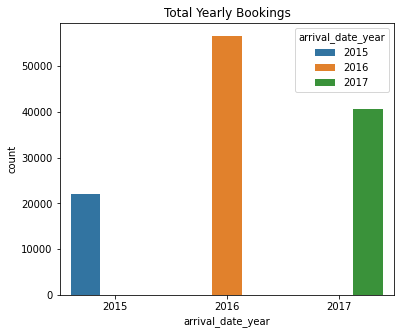

In [ ]:
# Plotting Total Hotel Bookings Yearly
plt.subplots(figsize=(6,5))
sns.countplot (x= 'arrival_date_year', data= data_df, hue='arrival_date_year')
plt.title('Total Yearly Bookings')

Text(0.5, 1.0, 'Yearly Bookings')

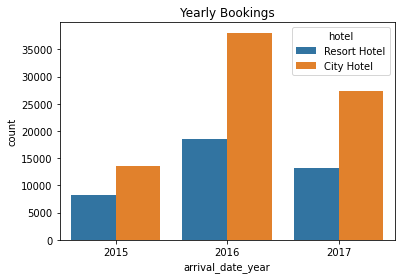

In [ ]:
# Plotting Hotel wise Bookings Yearly
sns.countplot (x= 'arrival_date_year', data = data_df, hue= 'hotel')
plt.title('Yearly Bookings') 

**INFERENCE:**

We can see that the **highest number of hotel bookings happened in 2016**, and the number of **City Hotel Booking is more than Resort Hotel Booking** every year. Further, more than double bookings were made in 2016 as compared to 2015. Although, the bookings were decreased by almost 15% in 2017.

## Second Objective: Finding how many Bookings that were canceled or not canceled ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Booking')

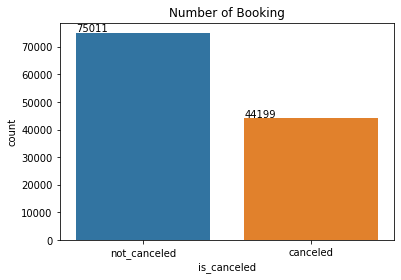

In [ ]:
# Plotting Booking that were canceled and not cancelled
data_df['is_canceled'] = data_df.is_canceled.replace([0,1], ['not_canceled', 'canceled'])
bx = sns.countplot(data_df['is_canceled'])
for x in bx.patches:
    bx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))
plt.title('Number of Booking')

**INFERENCE:**

The above countplot shows the total number of not canceled vs canceled bookings. It shows that the majority of bookings were not canceled.


## Third Objective: Visualizing the number of hotel bookings that were canceled and not canceled Yearly

Text(0.5, 1.0, 'Total number of booking hotel wise')

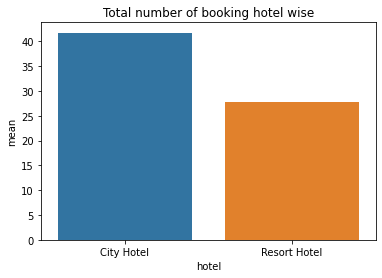

In [ ]:
# Plotting total number of booking hotel wise
ax = df_hotel.groupby("hotel")['is_canceled'].describe()
sns.barplot(x = ax.index, y = ax["mean"] * 100)
plt.title('Total number of booking hotel wise')

**INFERENCE**:

The plot shows that majority of bookings took place in City Hotel.



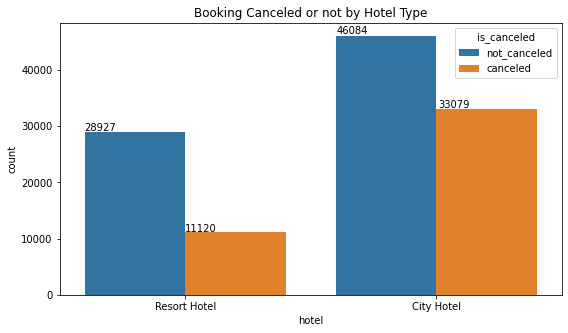

In [ ]:
# Plotting number of hotel booking that were canceled or not by Hotel Type
plt.subplots(figsize=(9,5))
plt.title("Booking Canceled or not by Hotel Type")
bx = sns.countplot(x = "hotel", hue = 'is_canceled', data = data_df)
for x in bx.patches:
    bx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

**INFERENCE:** 

The plot shows around 30% bookings were cancelled in resort hotel and 40% city hotel.


Text(0.5, 1.0, 'Yearly Hotel-wise bookings that are not canceled')

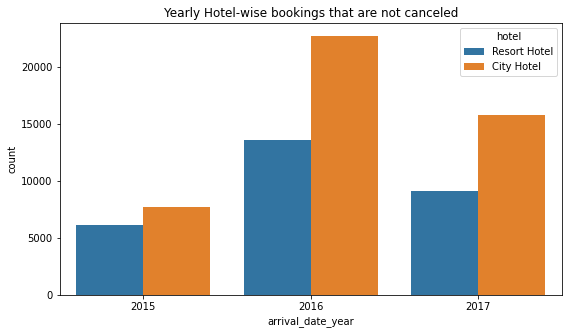

In [ ]:
# Yearly Hotel-wise bookings that are not canceled
data_df_not_canceled = df_hotel[df_hotel['is_canceled'] != 1]
plt.subplots(figsize=(9,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data = data_df_not_canceled)
plt.title('Yearly Hotel-wise bookings that are not canceled')

**INFERENCE:**

The above countplot shows that in every year number of not canceled bookings are more in City hotel bookings than compared to Resort hotel.



Text(0.5, 1.0, 'Yearly Hotel-wise bookings that are canceled')

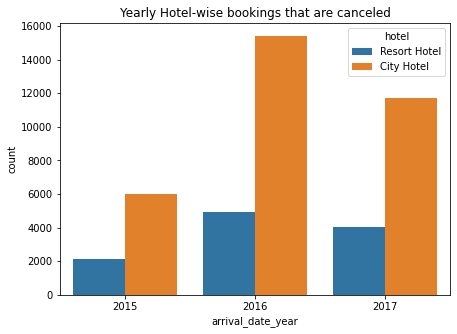

In [ ]:
# Yearly Hotel-wise bookings that are canceled
data_df_canceled = df_hotel[df_hotel['is_canceled'] == 1]
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data = data_df_canceled)
plt.title('Yearly Hotel-wise bookings that are canceled')

**INFERENCE:**

The above countplot shows that in every year number of canceled bookings are more in City hotel bookings than compared to Resort hotel. Further, their is a high rise in cancelation of booking in City hotel as compared to Resort hotel.

## Fourth Objective: From which Country the most guests are coming.

Text(0.5, 1.0, 'Country from where most guests are coming')

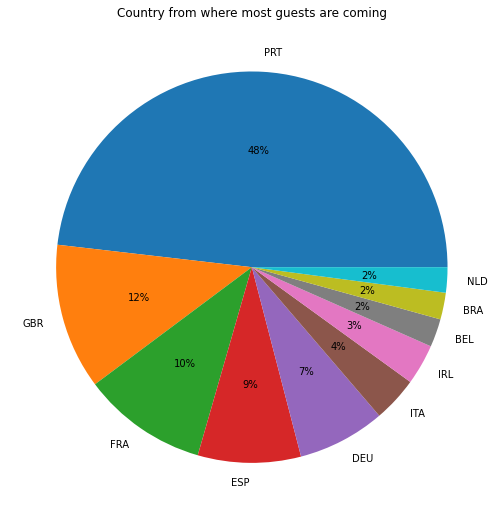

In [ ]:
# Plotting from which Country the most guests are coming.
country_index = list(data_df.country.value_counts().head(10).index)
country = list(data_df.country.value_counts().head (10))
#sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))
plt.rcParams['figure.figsize'] = 9,9
plt.pie(country, labels = country_index, autopct='%.0f%%')
plt.title('Country from where most guests are coming')


Text(0.5, 1.0, 'Number of visitors coming from different countries')

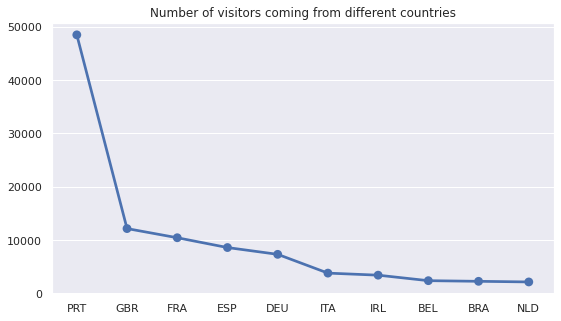

In [ ]:
# Plotting lineplot for country wise visitors
sns.pointplot (x= country_index, y = country)
plt.title('Number of visitors coming from different countries')
plt.xlabel('Countries')

**INFERENCE:**

The highest numbers of visitors are from countries like Portugal, United Kingdom, France, Spain and Germany, more than 80% come from these five countries.

## Fifth Objective: Market Segment wise hotel bookings

Text(0.5, 1.0, 'Market Segments wise booking')

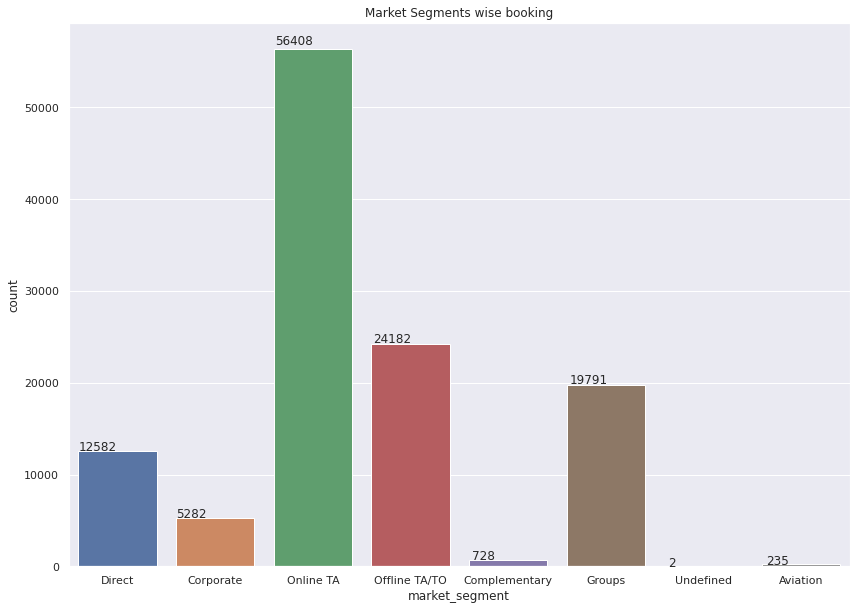

In [ ]:
# Plotting booking of hotels market segment wise
plt.subplots(figsize=(14, 10))
gx = sns.countplot(x = "market_segment", data = data_df)
for x in gx.patches:
    gx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))
plt.title("Market Segments wise booking")    

**Inference:** 

Bookings through online and offline travel agents are higher as compared to group bookings and direct bookings. The majority of people go for travel agents for hotel bookings.

## Sixth Objective: Finding relationship between cancelation and market segmentation

Text(0.5, 1.0, 'Booking Canceled or not by market segment')

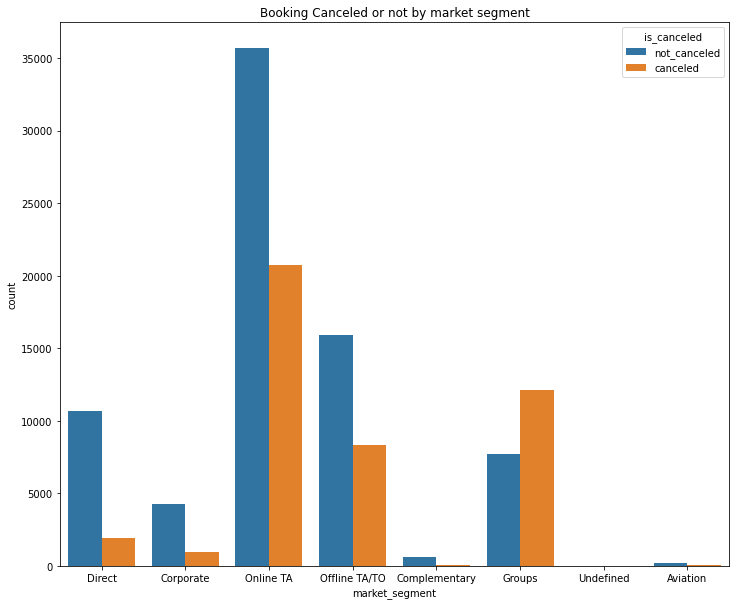

In [ ]:
# Plotting countplot for finding relationship between cancelation and market segmentation
plt.subplots(figsize=(12, 10))
sns.countplot(x = 'market_segment', hue='is_canceled', data = data_df)
plt.title("Booking Canceled or not by market segment")

**Inference:**

Plot shows that Groups segment has cancellation rate of round about 60%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate of more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. t is fact that cancellations that are made collectively like group reservations has high cancellation rate as different visitors may not free at same to visit hotel.
It is interesting to note that direct segment has cancellation rate of less than 20%.


## Seventh Objective: Finding cancellations with respect to customer types

Text(0.5, 1.0, 'Hotel booking cancellations with respect to customer type')

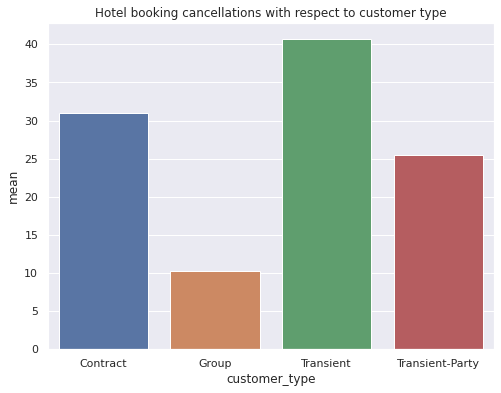

In [ ]:
# Plotting hotel booking cancellations with respect to customer types.
plt.subplots(figsize=(8, 6))
x = df_hotel.groupby("customer_type")['is_canceled'].describe()
sns.barplot(x = x.index, y = x["mean"] * 100)
plt.title('Hotel booking cancellations with respect to customer type')

**Inference:**

The plot shows that majority of bookings are transient. Transient booking is a booking that is not a part of a contract or group. This shows that Booking online is becoming increasingly consumer friendly.

## Eight Objective: Busy months for Hotels

Text(0, 0.5, 'Booking (%)')

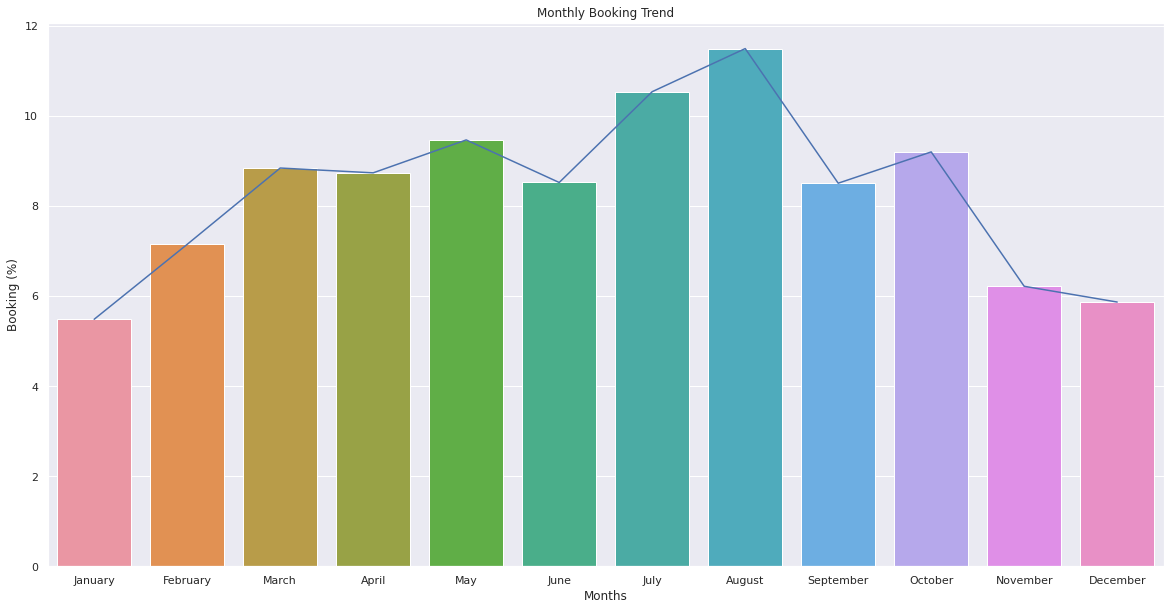

In [ ]:
# Plotting monthly hotel bookings 
plt.subplots(figsize=(20, 10))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

months_sorted = data_df_not_canceled['arrival_date_month'].value_counts().reindex(months)

month_index = months_sorted.index
booking_percentage = months_sorted/months_sorted.sum()*100

# Plotting Bar graph and Line plot
sns.lineplot(x = month_index, y = booking_percentage.values)
sns.barplot(x = month_index, y = booking_percentage.values)

plt.title("Monthly Booking Trend")
plt.xlabel("Months")
plt.ylabel("Booking (%)")

**Inference:**

The plot shows most of the bookings were made from July to August, and the least bookings were placed at the start and end of the year.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

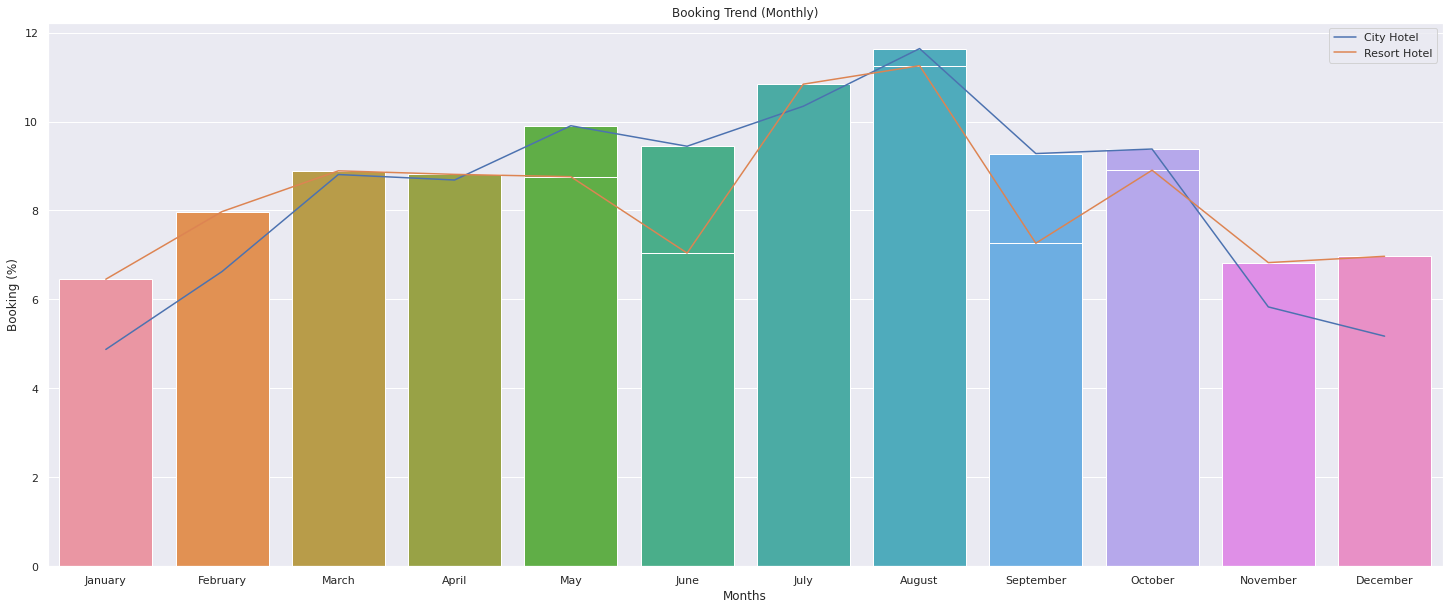

In [ ]:
# Plotting monthly hotel wise bookings 
plt.subplots(figsize=(25, 10))
plt.title("Booking Trend (Monthly)")
plt.xlabel("Months")
plt.ylabel("Booking (%)")

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

# Select only City_Hotel
months_sorted_1 = data_df_not_canceled.loc[df_hotel.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(months)
months_index_1 = months_sorted.index
booking_percentage_1 = months_sorted_1/months_sorted_1.sum()*100

# Select only Resort Hotel
months_sorted_2 = data_df_not_canceled.loc[df_hotel.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(months)
months_index_2 = months_sorted.index
booking_percentage_2 = months_sorted_2/months_sorted_2.sum()*100

# Line Plot for City_Hotel
sns.lineplot(months_index_1, booking_percentage_1.values, label='City Hotel')

# Line Plot for Resort Hotel
sns.lineplot(months_index_2, booking_percentage_2.values, label='Resort Hotel')

# Bar Plot for City_Hotel  
gx = sns.barplot(months_index_1, booking_percentage_1.values, label='City Hotel')

# Bar Plot for Resort Hotel 
dx = sns.barplot(months_index_2, booking_percentage_2.values, label='Resort Hotel')


Text(0, 0.5, 'Count')

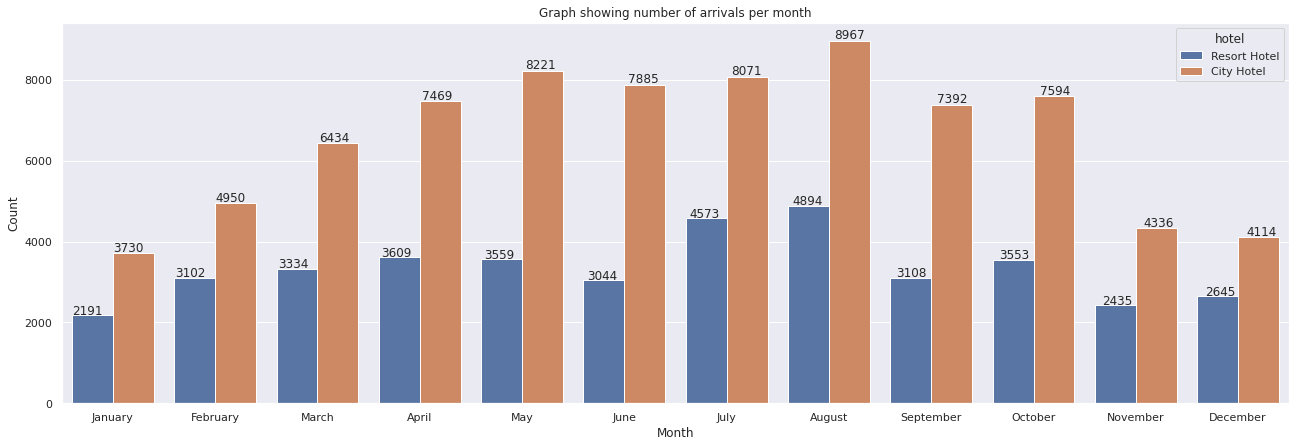

In [ ]:
# Plotting monthly hotel wise bookings 
plt.figure(figsize=(22,7))
dx = sns.countplot(x = 'arrival_date_month', hue = 'hotel', data = data_df[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']], order = months)
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))
plt.title('Graph showing number of arrivals per month')
plt.xlabel('Month') 
plt.ylabel('Count') 

**Inference:**

We can see that bookings for both City and Resort Hotel are high in July and August, and lower in start and end of the year. Further, period from May to August is busiest for both the hotels. 

## Nineth Objective: Finding the most booked accommodation type as Family, Couple, Single

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


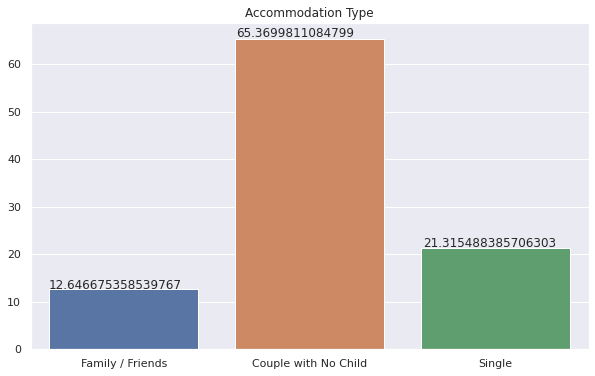

In [ ]:
# Plotting the most booked accommodation type as Family, Couple, Single 
plt.subplots(figsize=(10, 6))

# Calculating Family, Couple, Single
family = data_df_not_canceled[data_df_not_canceled.adults + data_df_not_canceled.children + data_df_not_canceled.babies > 2]
couple   = data_df_not_canceled[(data_df_not_canceled.adults==2) & (data_df_not_canceled.children==0) & (data_df_not_canceled.babies==0)]
single   = data_df_not_canceled[(data_df_not_canceled.adults==1) & (data_df_not_canceled.children==0) & (data_df_not_canceled.babies==0)]


# Make the list of Category names, and their total percentage
names = ['Family / Friends', 'Couple with No Child', 'Single']
count = [family.shape[0],couple.shape[0], single.shape[0]]
count_percent = [x/data_df_not_canceled.shape[0]*100 for x in count]


# Draw the Barplot
plt.title('Accommodation Type')
dx = sns.barplot(names,count_percent,  label='Booking (%)')

# Assign corresponding count percentage values
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

**Inference:**

The plot shows Couple with no children is the most popular accommodation type. So hotels can provide plans accordingly.

## Tenth Objective: Finding the Deposit Type with respect to cancelation

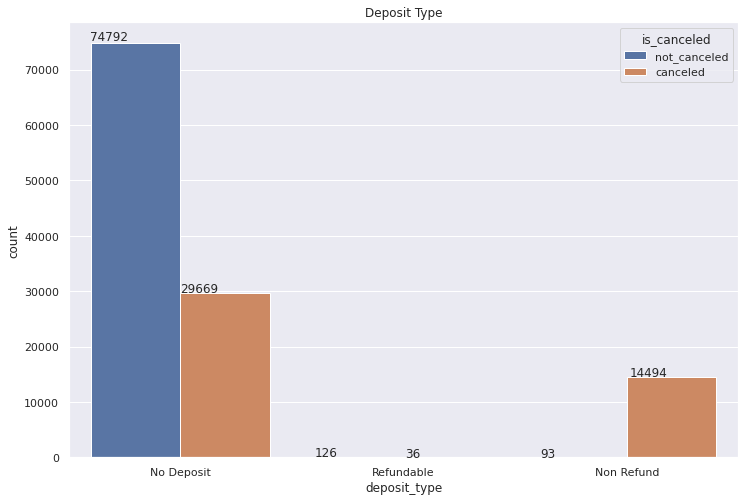

In [ ]:
plt.figure(figsize=(12, 8))
dx = sns.countplot(x = 'deposit_type', data = data_df, hue = 'is_canceled')
plt.title('Deposit Type')
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

**Inference:**

The majority of bookings that are canceled are from deposit type that does not require any deposit, due to this the high cancelation rate is observed. Also it is interesting to note that refundable deposits had less cancellation than non-refundable deposits. Logically one would have assumed that non-refundable deposits have less cancellation as hotel rates are usually higher.

## Eleventh Objective: Finding the relationship between Reservation Status and cancelation

Text(0.5, 1.0, 'Reservation')

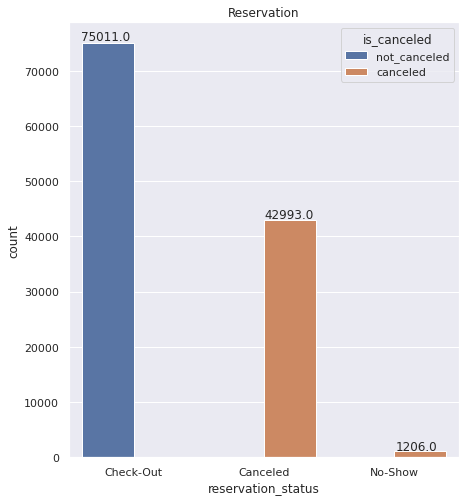

In [ ]:
# Plotting the Reservation status of visitors
plt.figure(figsize=(7,8))
dx = sns.countplot(x ='reservation_status', data = data_df, hue = 'is_canceled')
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

plt.title('Reservation')

**Inference:**

The graph shows most of the people how booked the hotel done checkout. This implies most people who do the reservation came to the hotel.

## Twelfth Objective: Finding visitors that stay on weekends and week days.


Text(0.5, 1.0, 'Number of visitors in weekend nights')

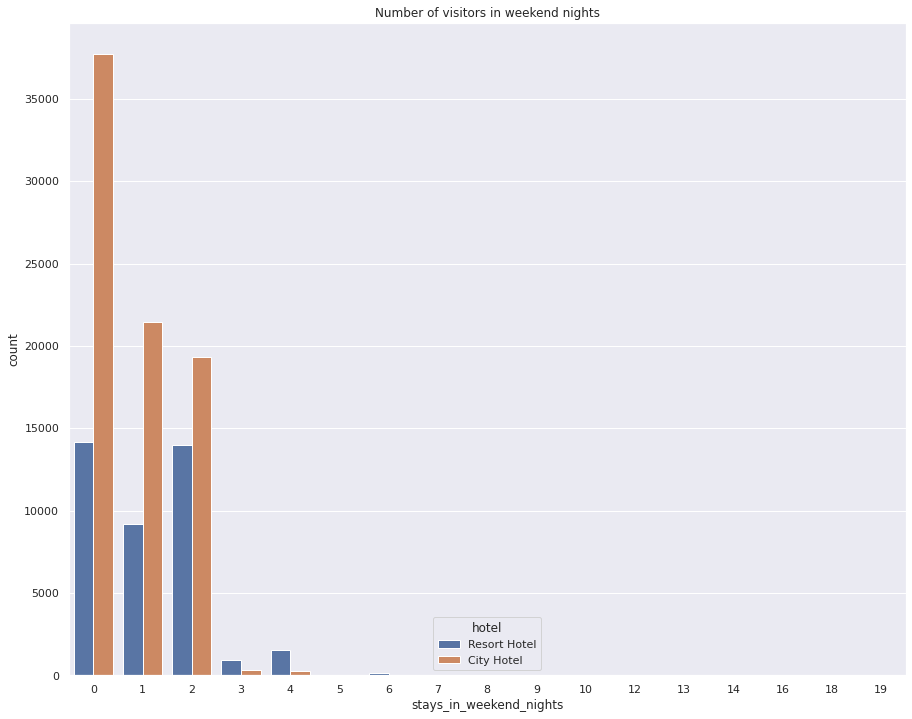

In [ ]:
# Plotting number of visitors in weekend nights
plt.figure(figsize=(15,12))
sns.countplot(x ='stays_in_weekend_nights', data = data_df, hue = 'hotel')
plt.title('Number of visitors in weekend nights')

Text(0.5, 1.0, 'Number of visitors in weekend nights')

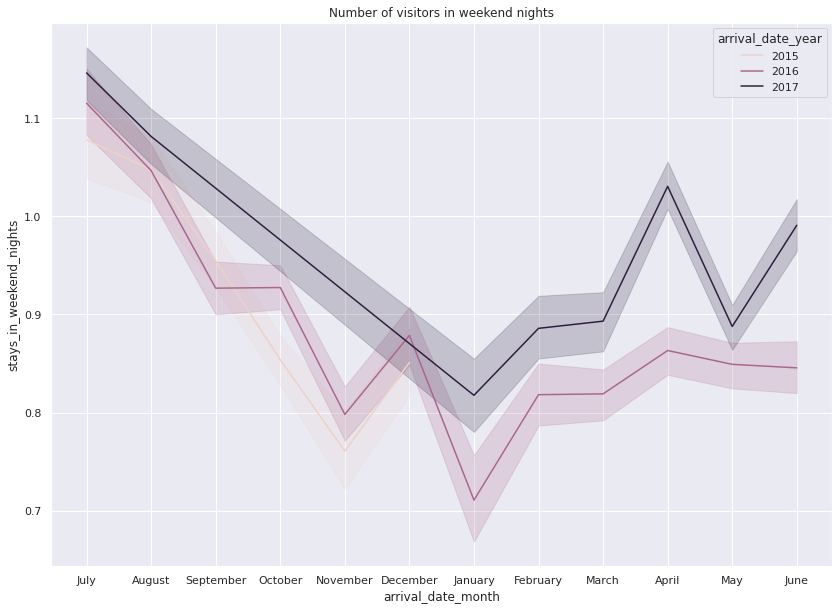

In [ ]:
# Plotting Line plot for number of visitors in weekend nights
plt.figure(figsize=(14, 10))
sns.lineplot(x = "arrival_date_month", y = "stays_in_weekend_nights", hue='arrival_date_year', data = data_df)
plt.title('Number of visitors in weekend nights')

**Inference:**

The above plots shows that the majority of visitors stay for one or less than one in weekend nights for both type of hotels. Further, most people stay in the month of July and August.

Text(0.5, 1.0, 'Number of visitors in week nights')

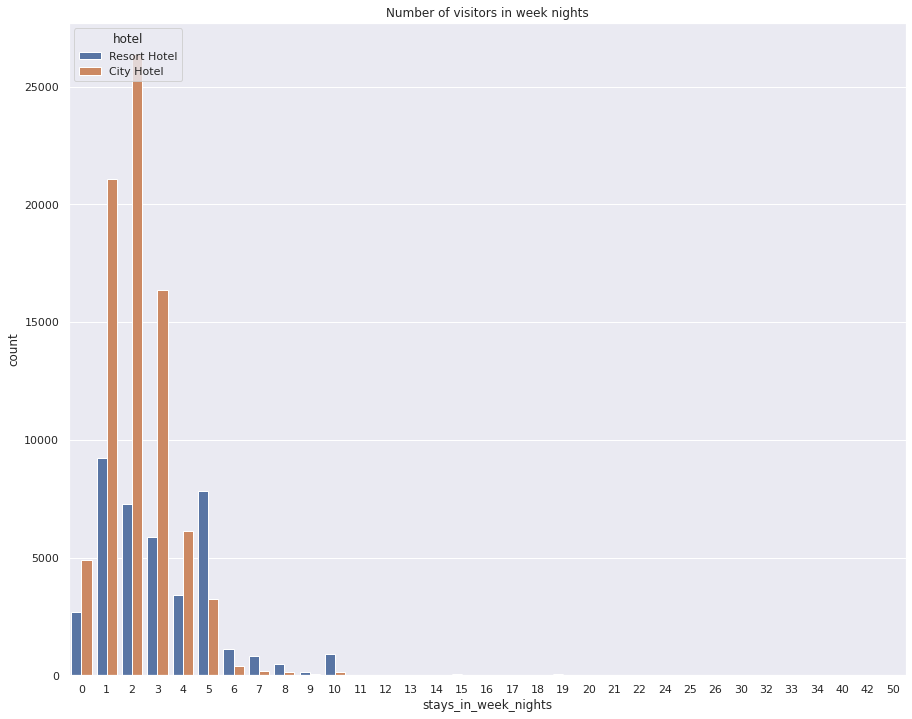

In [ ]:
# Plotting number of visitors in week nights
plt.figure(figsize=(15,12))
sns.countplot(x ='stays_in_week_nights', data = data_df, hue = 'hotel')
plt.title('Number of visitors in week nights')

As no of days increases people stay more in resort hotel. for longer stay people book resort.

Text(0.5, 1.0, 'Number of visitors in week nights')

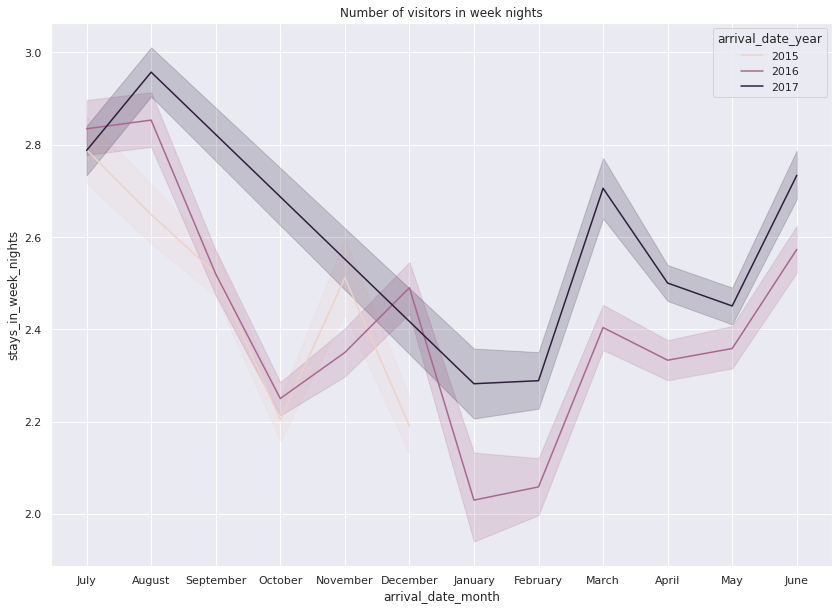

In [ ]:
# Plotting Line plot for number of visitors in weekend nights
plt.figure(figsize=(14, 10))
sns.lineplot(x = "arrival_date_month", y = "stays_in_week_nights", hue='arrival_date_year', data = data_df)
plt.title('Number of visitors in week nights')

**Inference:**

The above plots shows that 75% people stay for three or less than three days in week nights for both type of hotels. It is to be noted that as no of days increases people stay more in resort hotel than city hotel. Further, most people stay in the month of July and August.

## Thirteenth Objective: Visualizing type of visitors with respect to hotel type

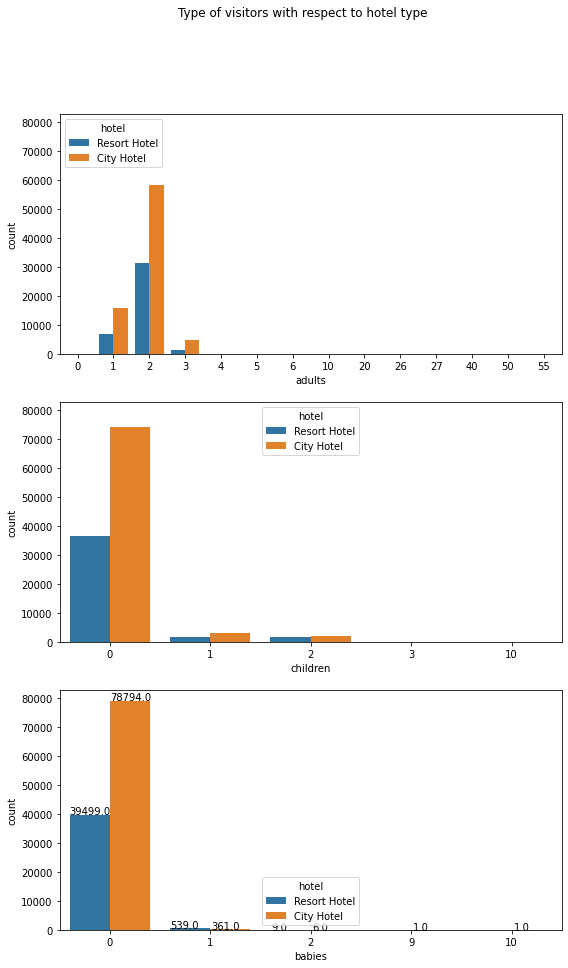

In [ ]:
# Plotting ype of visitors with respect to hotel type
fig, axes = plt.subplots(3, 1, figsize=(9, 15), sharey=True)
fig.suptitle('Type of visitors with respect to hotel type')

# Adult Plot
sns.countplot(ax=axes[0], x= 'adults', hue = 'hotel', data = data_df)

# Children Plot
sns.countplot(ax=axes[1], x= 'children', hue = 'hotel', data = data_df)

# Babies Plot
dx = sns.countplot(ax=axes[2], x= 'babies', hue = 'hotel', data = data_df)
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

**Inference:**

The plot shows that most of the visitors of both the hotels are adults either couple or single with no children and babies. Further, couple with babies prefer Resort Hotels.

## Fourtheenth Objective: Finding preferred meals by visitors

Text(0.5, 1.0, 'Preferred Meals')

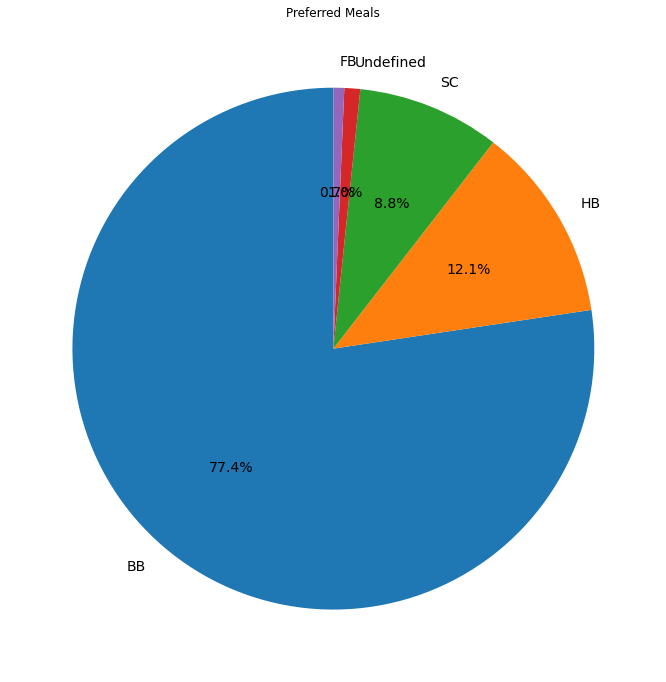

In [ ]:
labels = data_df['meal'].value_counts().index.tolist()

#Convert value counts to list
sizes = data_df['meal'].value_counts().tolist()

#Enlarging pie chart
plt.rcParams['figure.figsize'] = 12,12

#Explode to determine how much each section is separated from each other
explode = (0,0.075)

# Plot pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Preferred Meals')


**Inference:**

Most of the visitors prefer for Bead and Breakfast meal followed by Half board, and then SC (no meal package).
 


## Fiveteenth Objective: Finding Repeated Guest

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

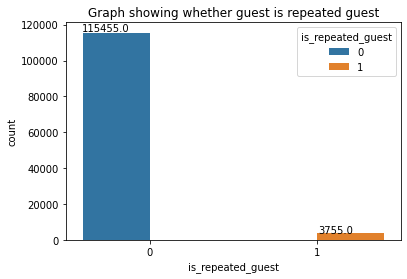

In [ ]:
# Plotting the Repeat Guest
dx = sns.countplot(data = data_df, x = 'is_repeated_guest', hue = 'is_repeated_guest')
for x in dx.patches:
    dx.annotate(str(x.get_height()), (x.get_x() * 1.007, x.get_height() * 1.007))

plt.title('Graph showing whether guest is repeated guest')

**Inference:**

The plot shows very low number of repeated guests. Further, marketing or business should be drafted to improve repeated guests.

# **SUMMARY**

Hotel Booking Analysis project was done by 2 team members – Shubham and Amit Saxena. In this project, we got a hotel booking CSV file as input. 

So, we decided first to explore the dataset to find out features that will be useful in doing our analysis. 


**SHUBHAM**

Hotels not only plays a vital role in hospitality services but also provides a boost to the tourism industry. Good Hospitality services can provide attract more visitors to hotels which in turn can provide more growth to the tourism industry. In this project, we have tried to explore some interesting facts with respect to hotels' and visitors' point of view. The conclusion provided can help to understand the hotels that how they can improve their facilities to gain more visitors at the same time it will also provide information for visitors related to the best booking time, meals, and offers provided by the hotels. 

The present data set includes hotel booking analysis from 2015 to 2017 in City and Resort hotels and includes some interesting features such as arrival_date_year, customer_type, is_canceled, market_segment, meal, tays_in _weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest that I have used while analyzing the data set.
I started by cleaning the data set to remove noise from the data set by dropping unnecessary columns, replacing columns  that have null values with 0, and missing values in the country and children columns are replaced with mode and mean values respectively. Afterward, I started doing data visualization on the respective data set. Some of my key findings were: 

1) People prefer City hotels for a shorter duration of stay over Resort Hotels and vice-versa. Further, couples with babies prefer to stay in Resort hotels. 

2) From May to August the hotels are busy. 

3) Visitors prefer online/offline travel agents and tour operators for their hotel bookings. 

4) More than 80% of visitors are coming from countries like Portugal, United Kingdom, France, Spain, and Germany. 

5) Repeating guests percentage is very low, only 3% of visitors are repeated - This shows visitors are not satisfied with the services provided by the hotels, hotels need to improve their services by taking feedback from the visitors at the checkout points.


**AMIT**

The Hospitality industry sector is one of the most profitable, accounting for more than 8% of the country's workforce and hotels plays a vital role in the hospitality services. Good Hospitality services can attract more visitors to hotels which in turn can provide more growth to the tourism industry. In this project we are tying to showcase interesting facts respect to hotels and visitors point of view. Hotels can get more insight related to facilities and how can increase visitors at the same time. It will also provide best time for booking and offers provided by the hotels.

The present data set includes hotel booking analysis from 2015 to 2017 in City and Resort hotels and includes some interesting features such as arrival_date_year, customer_type, is_canceled, market_segment, meal, tays_in _weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest that I have used while analyzing the data set. First of all I strarted the cleaning of data set to remove bad data from the data set by dropping unnecessary columns, replacing columns that have null values with 0, and missing values in the country and children columns are replaced with mode and mean values respectively. Afterhat, I did data visualization on the respective data set. Some of my key findings were:

1) The Highest number of bookings happened in 2016, City Hotel Booking is more than Resort Hotel Booking and bookings were decreased by almost 15% in 2017.

2) From May to August the hotels are busy.

3) Bookings through online and offline travel agents are higher as compared to group bookings and direct bookings. The majority of people go for travel agents for hotel bookings.

4) More than 80% of visitors are coming from countries like Portugal, United Kingdom, France, Spain, and Germany.

5) The majority of bookings that are canceled are from deposit type that does not require any deposit, due to this the high cancelation rate is observed. Also it is interesting to note that refundable deposits had less cancellation than non-refundable deposits. Logically one would have assumed that non-refundable deposits have less cancellation as hotel rates are usually higher.





# **CONCLUSION**

**HOTEL'S PERSPECTIVE**

1. Overall, People prefer City hotels over Resort Hotels. So, the hospitality industry can create new City hotels and can provide offers to visitors in Resort hotels to engage more visitors.
2. People for a shorter duration of stay prefer City hotels over Resort hotels and for longer stays go for Resort hotels.
3. From May to August the hotels seem busy. During this period hotels can increase their price for increasing their profits. Although, at the end and start of the year very few visitors arrive, in this period hotels can provide promotional offers to attract visitors.
4. Couples with no children and babies prefer to stay in both types of hotels. But couples with babies prefer to stay in Resort hotels. So, additional couple services can be provided to attract visitors towards hotels. Also, services like baby care can be provided in Resort hotels.
5. Visitors mostly prefer online/offline travel agents and tour operators for their hotel bookings. So, hotel advertising can be processed from this channel to increase the range of hotels.
6. More than 70% of people prefer BB meals, so menu prices can be increased. As most people prefer to do breakfast in hotels. At the same time, additional offers for lunch and dinners should be added to attract visitors.
7. The majority of bookings that are canceled are from a no deposit type that does not require any amount to be deposited, due to this a high cancelation rate is observed. Also, it is interesting to note that refundable deposits had fewer cancellations than non-refundable deposits. Logically one would have assumed that non-refundable deposits have fewer cancellations as hotel rates are usually higher.
8. The majority of bookings are transient (booking that is not a part of a contract or group). This shows that Booking online is becoming increasingly consumer friendly. Hotels can advertise and provide offers through this channel to increase their sales.
9. Countries like  Germany, Italy, Ireland, Belgium, Brazil, and the Netherlands have a very less number of visitors. Since they are in the top 10 countries from where visitors are coming so these country visitors have the potential to increase further if a proper advertising channel is established to engage them.
10. The most painful analysis in this data set is a very less number of people repeated, this shows people are not satisfied with the hotel services. Proper feedback should be taken at checkouts. Plus proper connectivity channels should be established with the visitors and hotels should send promotional offers and reminders to the visitors regularly to retain them.


**VISITOR'S PERSPECTIVE**

1. People planning big parties in resort and city hotels can plan at the start or end of the year as there is no rush and they can get heavy discounts in this period.
2. People can use online/offline travel agents and tour operators for booking their tickets since they seem to be the most trustworthy while booking hotels and people can also get better deals in the future through this channel.
3. People can go for BB meals in hotels since 77% of visitors preferred it.

